# 1.2 Interpolation and Resampling
In an ideal world we would have the same number of observations for each variable, sampled at the same frequency, but as we saw on the last section this is not the case. 

Naturally, we have two options 
- Reduce the sampling frequency by mean of `resampling`
- Increase the sampling frequency by means of `interpolation`  


## Resampling
:::{card} Exercise 1
Read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) for  `resample`.
Consider the temperature timeseries, compare the original data (daily observations) with the data resampled at 3 days, 5 days, a week and a month.
:::

In [1]:
from funciones import*
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
from importlib import reload

Data=pd.read_csv("../../Data/Time_series_DATA.txt",skiprows=149,index_col=0,sep='\t')
#file3=import_data_browser('https://raw.githubusercontent.com/iceclassic/mude/develop_1/data/Time_series_DATA.txt')
#Data=pd.read_csv(file3,skiprows=149,index_col=0,sep='\t')
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")


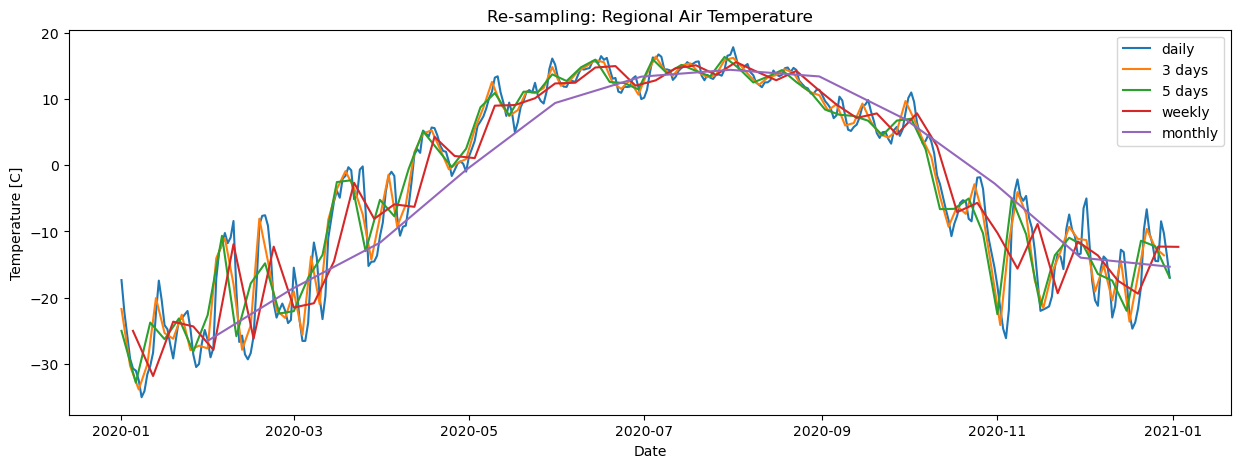

In [2]:
Temperature=Data['Regional: Air temperature [C]'] 
Temperature= Temperature[(Temperature.index.year >= 2020) & (Temperature.index.year < 2021)]
Temp_w3=Temperature.resample('3D').mean()
Temp_w5=Temperature.resample('5D').mean()
Temp_w7=Temperature.resample('W').mean()
Temp_w30=Temperature.resample('ME').mean()

fig, axs = plt.subplots(figsize=(15, 5))
plt.title('Re-sampling: Regional Air Temperature')
plt.plot(Temperature, label='daily')
plt.plot(Temp_w3,label='3 days')
plt.plot(Temp_w5,label='5 days')
plt.plot(Temp_w7,label='weekly')
plt.plot(Temp_w30,label='monthly')
plt.ylabel("Temperature [C]")
plt.xlabel("Date")
plt.legend()
plt.show()

We used the method `resample().mean`, but we can pass other potentially useful argument such as `.max`,`std`, `sum`, etc.
> connection to de-clustering time in EVA

For example, the rainfall data has daily observation but we might care about the precipitation of the total storm event that may last more than one day. 

::: {card} Exercise 2
Resample the rainfall observation using the `.sum` method
:::

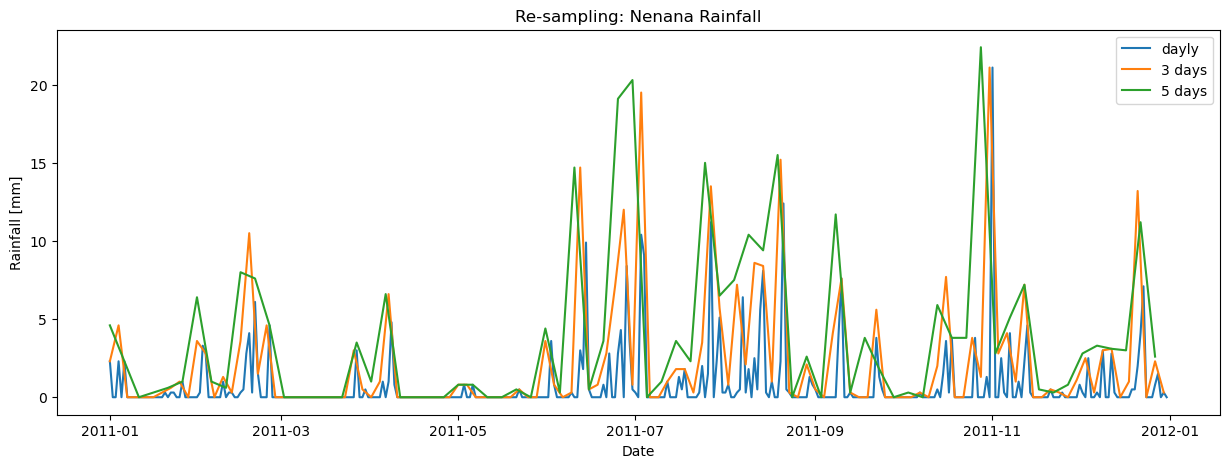

In [3]:
Rain=Data['Nenana: Rainfall [mm]']
         
Rain=Rain[(Rain.index.year >= 2011) & (Rain.index.year < 2012)]

Rain_d3=Rain.resample('3D').sum()
Rain_d5=Rain.resample('5D').sum()

fig, axs = plt.subplots(figsize=(15, 5))
plt.title('Re-sampling: Nenana Rainfall')
plt.plot(Rain, label='dayly')
plt.plot(Rain_d3,label='3 days')
plt.plot(Rain_d5,label='5 days')
plt.ylabel("Rainfall [mm]")
plt.xlabel("Date")
plt.legend()
plt.show()





## Interpolating
Interpolation in dataframes work a little bit different than in other languages, for example in Matla` we provide the *y_vector* , the *x_vector* and the *target_x_vector* such that by controlling the length/discretization of *target_x_vector* we can adjust the amount and location of the interpolated points. In dataframes, the location of the points is determined by the index of the original dataframe.

::: {card} Exercise 3

Use the `interpolate` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) to add daily observations to `Data['IceThickness [cm]' ]`, and plot the result
:::


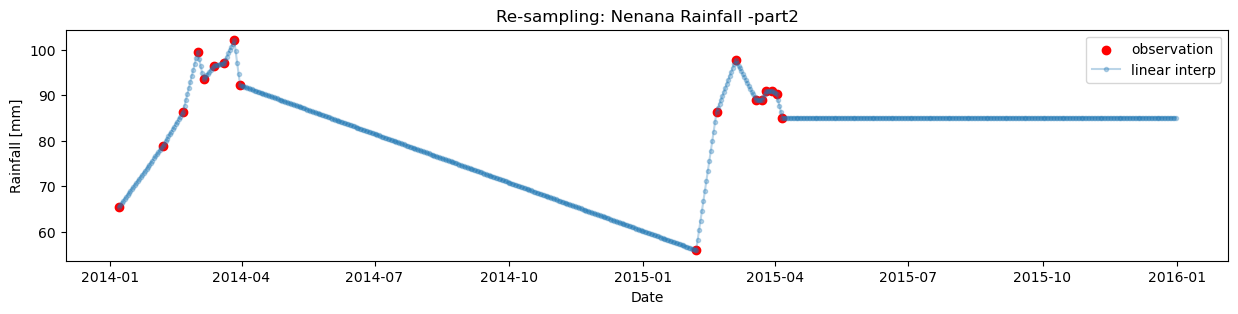

In [5]:
Data=Data[(Data.index.year >= 2014) & (Data.index.year < 2016)]
ICE_linear=Data['IceThickness [cm]'].interpolate(method='linear')
fig, axs = plt.subplots(figsize=(15, 3))
plt.title('Re-sampling: Nenana Rainfall -part2')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_linear.index,ICE_linear, label='linear interp',marker='o',alpha=0.3,markersize=3)
plt.ylabel("Rainfall [mm]")
plt.xlabel("Date")
plt.legend()
plt.show()

We can observe that the `interpolate`method interpolates be

## Other stuff
We can add a lot of content here:
- Importance of interpolating as a way to fill missing data in ML ( how to deal with N/A, using the mean? the mode?, interpolating, etc)
- Importance of interpolating in solving BVP using adaptive steps
- other (more advanced) interpolation method, i think cubic splines are a must know, at least in terms of what are they, why they are useful. ( maybe make a link with interpolation function in Finite Element ( as a way to discretize the domain))